In [2]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

['STATEFP10' 'COUNTYFP10' 'TRACTCE10' 'GEOID10' 'NAME10' 'NAMELSAD10'
 'COMMAREA' 'COMMAREA_N' 'NOTES' 'geometry']
(801, 10)


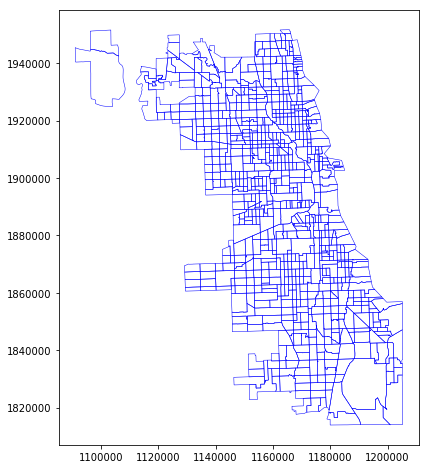

In [19]:
tracts = gpd.read_file(os.path.join('../''data','geo','Census_Tracts.gpkg'))
print(tracts.columns.values)
print(tracts.shape)
tracts.plot(figsize=[8,8], edgecolor='blue', linewidth=0.5, facecolor="none")

In [20]:
tracts.sample(5, random_state=42)

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,COMMAREA,COMMAREA_N,NOTES,geometry
697,17,031,570400,17031570400,5704,Census Tract 5704,57,57,None,"POLYGON ((1152221.982 1871395.421, 1152148.939..."
668,17,031,081600,17031081600,816,Census Tract 816,8,8,None,"POLYGON ((1175869.138 1903011.847, 1175867.840..."
63,17,031,760801,17031760801,7608.01,Census Tract 7608.01,76,76,None,"POLYGON ((1114152.216 1938579.499, 1114154.748..."
534,17,031,061902,17031061902,619.02,Census Tract 619.02,6,6,None,"POLYGON ((1174672.911 1922296.584, 1174634.873..."
66,17,031,252101,17031252101,2521.01,Census Tract 2521.01,25,25,None,"POLYGON ((1138277.310 1895970.988, 1138168.441..."


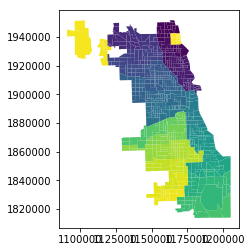

In [21]:
tracts.plot(column='COMMAREA_N') 

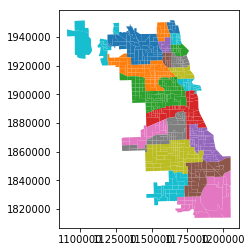

In [23]:
tracts.plot(column='COMMAREA') 

In [22]:
tracts.info()
#though the two variables contain the same data (commarea, commarea_n) one is coded as an integer and the other an object
#(string, therefore the colour code categories are different - continuous or categorical)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   STATEFP10   801 non-null    object  
 1   COUNTYFP10  801 non-null    object  
 2   TRACTCE10   801 non-null    object  
 3   GEOID10     801 non-null    object  
 4   NAME10      801 non-null    object  
 5   NAMELSAD10  801 non-null    object  
 6   COMMAREA    801 non-null    object  
 7   COMMAREA_N  801 non-null    int64   
 8   NOTES       12 non-null     object  
 9   geometry    801 non-null    geometry
dtypes: geometry(1), int64(1), object(8)
memory usage: 62.7+ KB


In [24]:
tracts.groupby('COMMAREA').count()
# has counted all commareas in each category

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,COMMAREA_N,NOTES,geometry
COMMAREA,,,,,,,,,
1,12,12,12,12,12,12,12,0,12
10,8,8,8,8,8,8,8,1,8
11,6,6,6,6,6,6,6,0,6
12,4,4,4,4,4,4,4,0,4
13,4,4,4,4,4,4,4,0,4
...,...,...,...,...,...,...,...,...,...
75,7,7,7,7,7,7,7,1,7
76,6,6,6,6,6,6,6,3,6
77,17,17,17,17,17,17,17,0,17


In [28]:
df = pd.read_csv(os.path.join('../','data','src','2019-Crime.csv.gz'), compression='gzip')

In [29]:
df.shape

(260025, 22)

In [30]:
df.columns.values

array(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic',
       'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'], dtype=object)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260025 entries, 0 to 260024
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    260025 non-null  int64  
 1   Case Number           260025 non-null  object 
 2   Date                  260025 non-null  object 
 3   Block                 260025 non-null  object 
 4   IUCR                  260025 non-null  object 
 5   Primary Type          260025 non-null  object 
 6   Description           260025 non-null  object 
 7   Location Description  258928 non-null  object 
 8   Arrest                260025 non-null  bool   
 9   Domestic              260025 non-null  bool   
 10  Beat                  260025 non-null  int64  
 11  District              260025 non-null  int64  
 12  Ward                  260010 non-null  float64
 13  Community Area        260025 non-null  int64  
 14  FBI Code              260025 non-null  object 
 15  

In [33]:
df.drop(index=df[df.Latitude.isna()].index, inplace=True)
df.shape

(258853, 22)

In [35]:
crimes = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude, crs='epsg:4326'))
#getting the gps points from lat and long fields, setting crs
# decimal lat long will probably be at the CRS specified 

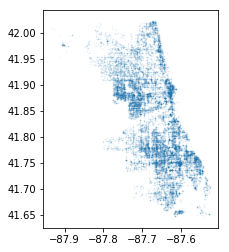

In [38]:
crimes[crimes['Primary Type']=='ASSAULT'].plot(markersize=0.25, alpha=0.1)
# enables us to see where the crime points are in the dataset (testing that the geopoints have been imported properly)

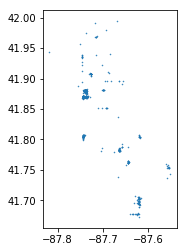

In [37]:
crimes[crimes['Primary Type']=='PROSTITUTION'].plot(markersize=0.25)

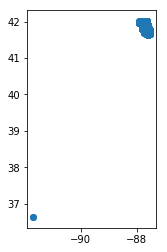

In [39]:
crimes.plot()  # plots every crime that happened - this is showing some strange outliers outside the city boundary

In [44]:
crimes.drop(index=crimes[crimes.Longitude < -89].index, inplace=True)
# so we want to drop those that are way outside the city boundary 

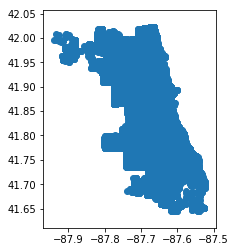

In [43]:
crimes.plot()  # plots every crime that happened

In [46]:
tracts.crs  # this shows us taht though we imported it as epsg:4326 above, it is actually epsg: 3425

<Projected CRS: EPSG:3435>
Name: NAD83 / Illinois East (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - Illinois - SPCS - E
- bounds: (-89.28, 37.06, -87.02, 42.5)
Coordinate Operation:
- name: SPCS83 Illinois East zone (US Survey feet)
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [45]:
crimes = crimes.to_crs(tracts.crs)  
# so now we are resetting it down below

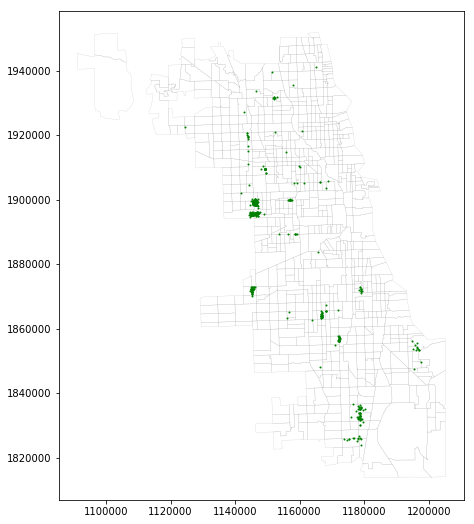

In [51]:
ax = tracts.plot(facecolor='none', edgecolor=(0.3,0.3,0.3,0.3), linewidth=0.25, figsize=(9,9))
# basemap creation above (doesn't have ax= to start, we add that after because of the command below)
crimes[crimes['Primary Type']=='PROSTITUTION'].plot(ax=ax, markersize=1, color='green')
# now we are plotting the prostitution data ontop of the basemap 

In [52]:
crimes.columns.values
#shows us we don't a standardized census tract so we have to do a spatial join

array(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic',
       'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location', 'geometry'], dtype=object)

In [53]:
tract_crimes = gpd.sjoin(crimes[crimes['Primary Type']=='PROSTITUTION'],tracts, op='within')
# joining the prostitution data to the census tract info using a spatial join based on where they are within 

In [54]:
tract_crimes.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,index_right,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,COMMAREA,COMMAREA_N,NOTES
8989,11934142,JC562348,12/27/2019 06:10:00 PM,001XX S KENTON AVE,1506,PROSTITUTION,SOLICIT ON PUBLIC WAY,STREET,True,False,...,68,17,031,252202,17031252202,2522.02,Census Tract 2522.02,25,25,None
9351,11934044,JC562316,12/27/2019 06:35:00 PM,0000X S KENTON AVE,1506,PROSTITUTION,SOLICIT ON PUBLIC WAY,STREET,True,False,...,68,17,031,252202,17031252202,2522.02,Census Tract 2522.02,25,25,None
10143,11932996,JC552851,12/19/2019 11:38:00 AM,001XX S KENTON AVE,1506,PROSTITUTION,SOLICIT ON PUBLIC WAY,STREET,True,False,...,68,17,031,252202,17031252202,2522.02,Census Tract 2522.02,25,25,None
24695,11911370,JC534849,12/04/2019 06:50:00 PM,0000X S KENTON AVE,1506,PROSTITUTION,SOLICIT ON PUBLIC WAY,STREET,True,False,...,68,17,031,252202,17031252202,2522.02,Census Tract 2522.02,25,25,None
26157,11908378,JC531195,12/01/2019 06:45:00 PM,001XX S KENTON AVE,1506,PROSTITUTION,SOLICIT ON PUBLIC WAY,STREET,True,False,...,68,17,031,252202,17031252202,2522.02,Census Tract 2522.02,25,25,None


In [55]:
# drop irrelevant columns 
tract_crimes.drop(columns=['Date', 'Case Number', 'index_right', 'STATEFP10', 'COUNTYFP10', 'NOTES'], inplace=True)

In [56]:
tract_crimes.head()

,ID,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,...,Latitude,Longitude,Location,geometry,TRACTCE10,GEOID10,NAME10,NAMELSAD10,COMMAREA,COMMAREA_N
8989,11934142,001XX S KENTON AVE,1506,PROSTITUTION,SOLICIT ON PUBLIC WAY,STREET,True,False,1113,11,...,41.879148,-87.740568,"(41.879148115, -87.740567984)",POINT (1145676.000 1899109.000),252202,17031252202,2522.02,Census Tract 2522.02,25,25
9351,11934044,0000X S KENTON AVE,1506,PROSTITUTION,SOLICIT ON PUBLIC WAY,STREET,True,False,1113,11,...,41.880309,-87.740609,"(41.880309142, -87.740608663)",POINT (1145662.000 1899532.000),252202,17031252202,2522.02,Census Tract 2522.02,25,25
10143,11932996,001XX S KENTON AVE,1506,PROSTITUTION,SOLICIT ON PUBLIC WAY,STREET,True,False,1113,11,...,41.879085,-87.740565,"(41.879084981, -87.740564895)",POINT (1145677.000 1899086.000),252202,17031252202,2522.02,Census Tract 2522.02,25,25
24695,11911370,0000X S KENTON AVE,1506,PROSTITUTION,SOLICIT ON PUBLIC WAY,STREET,True,False,1113,11,...,41.879513,-87.740579,"(41.879513159, -87.740579299)",POINT (1145672.000 1899242.000),252202,17031252202,2522.02,Census Tract 2522.02,25,25
26157,11908378,001XX S KENTON AVE,1506,PROSTITUTION,SOLICIT ON PUBLIC WAY,STREET,True,False,1113,11,...,41.879148,-87.740568,"(41.879148115, -87.740567984)",POINT (1145676.000 1899109.000),252202,17031252202,2522.02,Census Tract 2522.02,25,25


In [57]:
# grouping by NAME 10 which is the name of the census tract
tract_crimes.groupby('NAME10').agg(np.sum)

,ID,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,COMMAREA_N
NAME10,,,,,,,,,,,,,
1301,11661112,1,0,1711,17,39.0,13,1151489.0,1939646.0,2019,41.990273,-87.718155,13
1402,59062065,5,0,8561,85,165.0,70,5761302.0,9659025.0,10095,209.843707,-438.577630,70
1404,11779115,1,0,1712,17,39.0,14,1146451.0,1933801.0,2019,41.974332,-87.736836,14
1407.01,11728783,1,0,1723,17,33.0,14,1152195.0,1931316.0,2019,41.967401,-87.715780,14
1502,11840398,1,0,1624,16,45.0,15,1142659.0,1927295.0,2019,41.956550,-87.750943,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8404,11776367,1,0,912,9,12.0,59,1165610.0,1883680.0,2019,41.836408,-87.667813,59
8407,35670401,3,0,3091,30,60.0,90,3476672.0,5667872.0,6057,125.555835,-263.076945,90
8423,11621531,1,0,1213,12,27.0,24,1168644.0,1905656.0,2019,41.896647,-87.656044,24


In [58]:
print(tract_crimes[tract_crimes.NAME10=='8430'].shape)
print(tract_crimes[tract_crimes.NAME10=='1301'].shape)
# this is just checking that this has been collapsed correctly (grouped by) so we can see it says below 
# 45 rows and 27 columns for the Name10 8430

(45, 27)
(1, 27)


In [60]:
# making the above into a named dataframe
tc_grdf = tract_crimes.groupby('NAME10').agg(np.sum)

(0, 30)

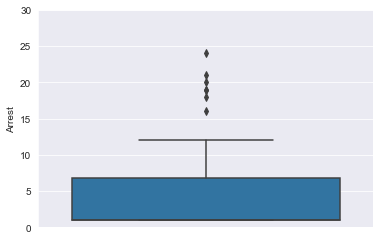

In [68]:
sns.set_style('darkgrid') 
# see seaborn gallery for more styles https://seaborn.pydata.org/examples/index.html
ax=sns.boxplot(y=tc_grdf.Arrest)
# nb. we are missing the zero off the bottom of this graph 
ax.set_ylim([0,30])   
# we are re-setting the plt limit by chopping off outliers 
# note this only works once you add ax= to the sns.boxplot 

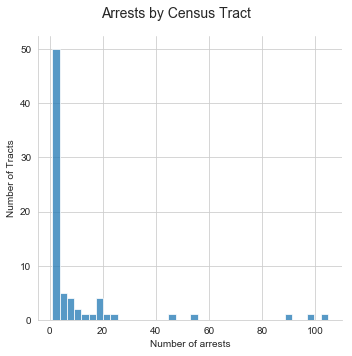

In [71]:
sns.set_style('whitegrid') 
ax=sns.displot(tc_grdf.Arrest) # changing it to displot (a histogram) , removing y=
ax.set(xlabel='Number of arrests', ylabel='Number of Tracts')
plt.gcf().subplots_adjust(top=0.9)
plt.gcf().suptitle('Arrests by Census Tract', fontsize=14);


In [72]:
type(tc_grdf)

geopandas.geodataframe.GeoDataFrame

In [73]:
tc_grdf.columns.values

array(['ID', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward',
       'Community Area', 'X Coordinate', 'Y Coordinate', 'Year',
       'Latitude', 'Longitude', 'COMMAREA_N'], dtype=object)

In [74]:
tc_grdf = tc_grdf[['Arrest']]

In [75]:
tc_grdf

,Arrest
NAME10,
1301,1
1402,5
1404,1
1407.01,1
1502,1
...,...
8404,1
8407,3
8423,1


In [77]:
tracts

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,COMMAREA,COMMAREA_N,NOTES,geometry
0,17,031,842400,17031842400,8424,Census Tract 8424,44,44,None,"POLYGON ((1177855.557 1845080.015, 1177855.599..."
1,17,031,840300,17031840300,8403,Census Tract 8403,59,59,None,"POLYGON ((1160668.954 1878739.961, 1160672.597..."
2,17,031,841100,17031841100,8411,Census Tract 8411,34,34,None,"POLYGON ((1176043.375 1889735.517, 1176045.942..."
3,17,031,841200,17031841200,8412,Census Tract 8412,31,31,None,"POLYGON ((1160019.224 1890664.257, 1160010.757..."
4,17,031,838200,17031838200,8382,Census Tract 8382,28,28,None,"POLYGON ((1165501.359 1897445.310, 1165538.639..."
...,...,...,...,...,...,...,...,...,...,...
796,17,031,071000,17031071000,710,Census Tract 710,7,7,None,"POLYGON ((1169304.836 1913647.470, 1169306.196..."
797,17,031,071200,17031071200,712,Census Tract 712,7,7,None,"POLYGON ((1171907.021 1914880.325, 1171911.354..."
798,17,031,130300,17031130300,1303,Census Tract 1303,13,13,None,"POLYGON ((1152539.157 1937002.093, 1152443.466..."
799,17,031,292200,17031292200,2922,Census Tract 2922,29,29,None,"POLYGON ((1153199.386 1890446.375, 1153092.407..."


In [82]:
# merging the census tracts data frame and the tcgr on the name of the census tract field
tcgr_gdf = pd.merge(tracts, tc_grdf, left_on='NAME10', right_on='NAME10', how='left')

# you can also do the above using right_index=True if the right dataset join var is index only
# because we specified 'how='left'' it is keeping all fields (outer join, keeping all fields)
# note this will generate missing fields 

In [83]:
tcgr_gdf.head()

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,COMMAREA,COMMAREA_N,NOTES,geometry,Arrest
0,17,031,842400,17031842400,8424,Census Tract 8424,44,44,None,"POLYGON ((1177855.557 1845080.015, 1177855.599...",NaN
1,17,031,840300,17031840300,8403,Census Tract 8403,59,59,None,"POLYGON ((1160668.954 1878739.961, 1160672.597...",NaN
2,17,031,841100,17031841100,8411,Census Tract 8411,34,34,None,"POLYGON ((1176043.375 1889735.517, 1176045.942...",NaN
3,17,031,841200,17031841200,8412,Census Tract 8412,31,31,None,"POLYGON ((1160019.224 1890664.257, 1160010.757...",NaN
4,17,031,838200,17031838200,8382,Census Tract 8382,28,28,None,"POLYGON ((1165501.359 1897445.310, 1165538.639...",NaN


In [84]:
tcgr_gdf.shape

# when you don't include 'how='left'' this ends up with a subset of these fields.

(801, 11)

In [85]:
tcgr_gdf['Arrests'] = tcgr_gdf.Arrest.fillna(0)  # this fills blank fields with zeros, but in a new field called 'Arrests' not 'Arrest' to avoid overwriting the data  

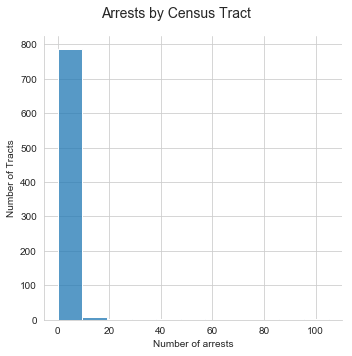

In [89]:
sns.set_style('whitegrid') 
ax=sns.displot(tcgr_gdf.Arrests) # changing it to displot (a histogram) , removing y=
ax.set(xlabel='Number of arrests', ylabel='Number of Tracts')
plt.gcf().subplots_adjust(top=0.9)  # gcf is get current figure top just enables the title to clear the top of the graph
plt.gcf().suptitle('Arrests by Census Tract', fontsize=14);

In [90]:
# getting fonts

import matplotlib
loc = matplotlib.get_cachedir()
!ls {loc}

fontList.json      fontlist-v310.json fontlist-v330.json tex.cache


In [92]:
fonts = !cat {loc + '/fontlist-v330.json'}
fonts = set(list(filter(lambda x:'"name"' in x, fonts)))
fonts = [x.replace('      "name": "','').replace('",','') for x in fonts]
print(fonts)
# list of all available fonts 

['Charter', 'cmss10', 'Apple Chancery', '.Helvetica Neue DeskInterface', 'Muna', 'Marlett', 'Diwan Kufi', '.Aqua Kana', 'Bradley Hand', 'ZapfDingbats', 'InaiMathi', 'Damascus', 'Helvetica Neue', 'Shree Devanagari 714', 'STIXIntegralsUpSm', 'Mishafi', 'Apple SD Gothic Neo', 'Hiragino Sans', 'Khmer MN', 'Phosphate', 'Microsoft Sans Serif', 'Gulim', 'Iowan Old Style', 'Tahoma', 'Bodoni Ornaments', 'Utopia', 'Bangla MN', 'Impact', 'Gurmukhi Sangam MN', 'STIXNonUnicode', 'Geeza Pro', 'SignPainter', 'DecoType Naskh', '.SF Compact Text', 'Diwan Thuluth', 'PT Sans', 'Arial', '.SF NS Text Condensed', 'Brush Script MT', 'cmsy10', 'Malayalam Sangam MN', 'Waseem', 'Sana', 'Cambria', 'Hiragino Sans GB', 'Bookshelf Symbol 7', 'Marion', 'Apple Symbols', 'Seravek', 'American Typewriter', 'Gujarati Sangam MN', 'cmtt10', 'cmex10', 'Palatino Linotype', 'Computer Modern', 'Farisi', 'Sinhala MN', 'Arial Narrow', 'Batang', 'Menlo', 'Herculanum', 'STIXIntegralsUp', 'Cochin', 'Euphemia UCAS', 'Constantia', 'H

In [95]:
# can then choose the fonts 
tfont = {'fontname':'Times New Roman', 'horizontalalignment':'left'}

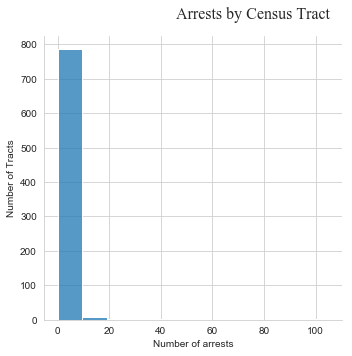

In [97]:
sns.set_style('whitegrid') 
ax=sns.displot(tcgr_gdf.Arrests) # changing it to displot (a histogram) , removing y=
ax.set(xlabel='Number of arrests', ylabel='Number of Tracts')
plt.gcf().subplots_adjust(top=0.9)  # gcf is get current figure top just enables the title to clear the top of the graph
plt.gcf().suptitle('Arrests by Census Tract', fontsize=16, **tfont);

# Create atlas type output

In [99]:
crimes.columns.values

array(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic',
       'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location', 'geometry'], dtype=object)

In [100]:
grp_crimes = crimes[['Community Area','Primary Type','Arrest']].groupby(['Community Area','Primary Type']).agg(np.sum).reset_index()

In [101]:
grp_crimes

,Community Area,Primary Type,Arrest
0,1,ARSON,0
1,1,ASSAULT,45
2,1,BATTERY,146
3,1,BURGLARY,19
4,1,CRIM SEXUAL ASSAULT,0
...,...,...,...
1902,77,ROBBERY,8
1903,77,SEX OFFENSE,4
1904,77,STALKING,0
1905,77,THEFT,80


In [102]:
grp_crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907 entries, 0 to 1906
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Community Area  1907 non-null   int64 
 1   Primary Type    1907 non-null   object
 2   Arrest          1907 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 44.8+ KB


In [103]:
tracts.info()

<bound method DataFrame.info of     STATEFP10 COUNTYFP10 TRACTCE10      GEOID10 NAME10         NAMELSAD10  \
0          17        031    842400  17031842400   8424  Census Tract 8424   
1          17        031    840300  17031840300   8403  Census Tract 8403   
2          17        031    841100  17031841100   8411  Census Tract 8411   
3          17        031    841200  17031841200   8412  Census Tract 8412   
4          17        031    838200  17031838200   8382  Census Tract 8382   
..        ...        ...       ...          ...    ...                ...   
796        17        031    071000  17031071000    710   Census Tract 710   
797        17        031    071200  17031071200    712   Census Tract 712   
798        17        031    130300  17031130300   1303  Census Tract 1303   
799        17        031    292200  17031292200   2922  Census Tract 2922   
800        17        031    630900  17031630900   6309  Census Tract 6309   

    COMMAREA  COMMAREA_N NOTES  \
0        

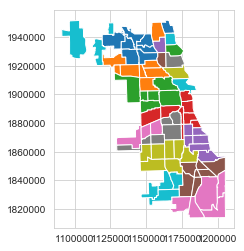

In [104]:
t1 = tracts.dissolve(by='COMMAREA').reset_index()
t1.columns.values
t1.plot(column='COMMAREA')

# so this is disolving the census tract areas into the commareas

In [105]:
t1.sample(3)

,COMMAREA,geometry,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,COMMAREA_N,NOTES
13,21,"POLYGON ((1157229.503 1918486.934, 1157162.843...",17,031,210602,17031210602,2106.02,Census Tract 2106.02,21,None
30,37,"POLYGON ((1175829.538 1868505.932, 1175799.279...",17,031,835500,17031835500,8355,Census Tract 8355,37,None
43,49,"POLYGON ((1172982.969 1830580.502, 1172978.904...",17,031,834000,17031834000,8340,Census Tract 8340,49,None


In [106]:
tgrp = pd.merge(grp_crimes, t1, how='left', left_on='Community Area', right_on='COMMAREA_N')
print(tgrp.columns.values)
tgrp = tgrp.set_geometry('geometry')
# now merging the crimes with the dissolved tracts dataframe by community area

['Community Area' 'Primary Type' 'Arrest' 'COMMAREA' 'geometry'
 'STATEFP10' 'COUNTYFP10' 'TRACTCE10' 'GEOID10' 'NAME10' 'NAMELSAD10'
 'COMMAREA_N' 'NOTES']


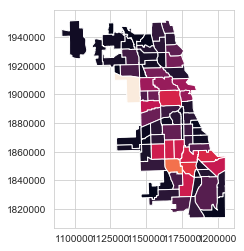

In [107]:
tgrp[tgrp['Primary Type']=='ASSAULT'].plot(column='Arrest')
# plotting assaults from the arrest column by primary type 

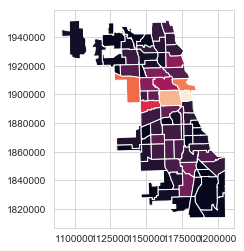

In [108]:
tgrp[tgrp['Primary Type']=='ROBBERY'].plot(column='Arrest')
# plotting robberies from the arrest column by primary type 

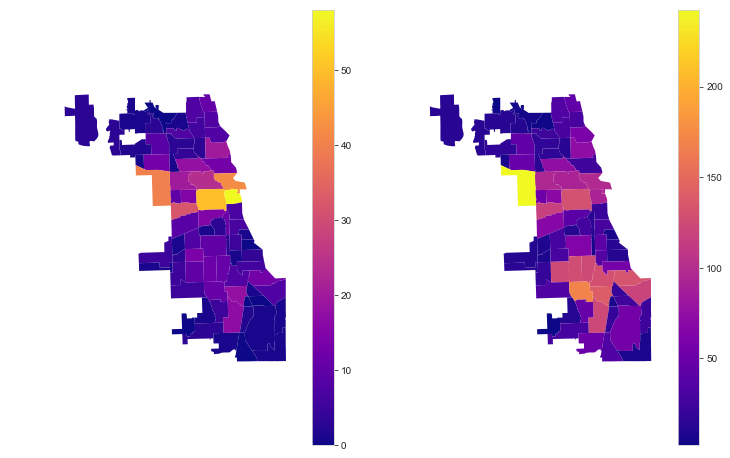

In [109]:
f,axes = plt.subplots(1,2,figsize=(12,8))

sns.set_style('whitegrid')
tgrp[tgrp['Primary Type']=='ROBBERY'].plot(ax=axes[0], column='Arrest', cmap='plasma', edgecolor='none', legend=True)
tgrp[tgrp['Primary Type']=='ASSAULT'].plot(ax=axes[1], column='Arrest', cmap='plasma', edgecolor='none', legend=True);

for ax in axes:
    ax.axis('off')
    
#plotting both side by side 


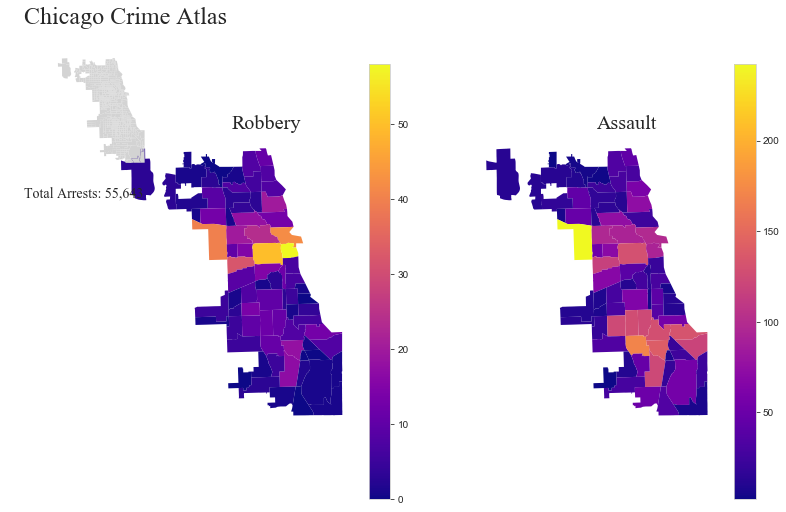

In [110]:
f,axes = plt.subplots(1,2,figsize=(12,8))

plt1 = 'ROBBERY'
plt2 = 'ASSAULT'

tgrp[tgrp['Primary Type']==plt1].plot(ax=axes[0], column='Arrest', cmap='plasma', edgecolor='none', legend=True)
tgrp[tgrp['Primary Type']==plt2].plot(ax=axes[1], column='Arrest', cmap='plasma', edgecolor='none', legend=True);

for ax in axes:
    ax.axis('off')

ax2 = f.add_axes([0.015, 0.7, 0.2, 0.2])
tracts.plot(facecolor='lightgrey', edgecolor='none', ax=ax2)
ax2.axis('off')

# Note -- calling this an atlas of crime would be *seriously* 
# misleading because it's only a record of crimes that resulted
# in police action of some sort
f.suptitle('Chicago Crime Atlas', x=0.025, ha='left', size=24, **tfont)
axes[0].set_title(plt1.capitalize(), size=20, **tfont)
axes[1].set_title(plt2.capitalize(), size=20, **tfont)

plt.figtext(x=0.025, y=0.65, s=f"Total Arrests: {tgrp.Arrest.sum():,.0f}", size=14, **tfont);